In [1]:
import matplotlib.pyplot as plt
import numpy as np
import config_data
import train
import data
import evaluate_thresholds
import pattern_functions

In [2]:
dataset_info = config_data.chosen_dataset
X_train, X_test, y_train, y_test = data.get_train_test_data(dataset_info)
clf = train.train_lr(dataset_info)
all_data = train.get_predictions(clf, X_test, y_test)
all_data

C:\Users\hetw\dev\projects\utility-based-fairness\data.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical] = scaler.transform(X_train[numerical])
C:\Users\hetw\dev\programs\Anaconda3\envs\utility-based-fairness\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\hetw\dev\projects\utility-based-fairness\data.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Score: 0.8


,month,credit_amount,investment_as_income_percentage,sex,residence_since,age,number_of_credits,people_liable_for,sex-age,status_A11,...,skill_level_A171,skill_level_A172,skill_level_A173,skill_level_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,Y,p
117,-0.913949,-0.394924,-0.894213,0,0.114617,1,1.030265,-0.420084,0,1,...,0,0,1,0,1,0,0,1,1,0.918311
734,-1.411336,0.053733,-1.791793,0,-1.719261,1,-0.690428,2.380476,0,0,...,0,0,1,0,1,0,1,0,1,0.964376
185,-0.499460,-0.672459,0.900945,1,-0.802322,1,1.030265,-0.420084,1,0,...,0,0,1,0,1,0,1,0,1,0.929413
936,-0.996847,-0.893552,0.003366,0,-0.802322,1,-0.690428,-0.420084,0,0,...,0,1,0,0,1,0,1,0,0,0.799325
507,-0.499460,1.301202,-1.791793,1,-0.802322,1,-0.690428,2.380476,1,0,...,0,0,0,1,0,1,1,0,0,0.504886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2.236170,0.220542,0.900945,1,1.031557,1,-0.690428,2.380476,1,0,...,0,1,0,0,1,0,1,0,0,0.419845
587,-0.748153,-0.697984,0.900945,1,-1.719261,0,-0.690428,-0.420084,0,1,...,0,1,0,0,1,0,1,0,1,0.621332
30,-0.250766,-0.473655,0.003366,1,0.114617,1,-0.690428,-0.420084,1,0,...,0,0,1,0,0,1,1,0,1,0.811865
730,0.246621,1.140505,-1.791793,1,-0.802322,1,-0.690428,-0.420084,1,0,...,0,0,1,0,1,0,1,0,1,0.640014


In [6]:
U_DM, U_DS_A0, U_DS_A1, FS, t0, t1 = evaluate_thresholds.evaluate_model(all_data)
points = np.array(list(zip(FS, U_DM)))
pareto_front_indices = evaluate_thresholds.is_pareto_efficient(points, False)
pareto_front_size = len(pareto_front_indices)

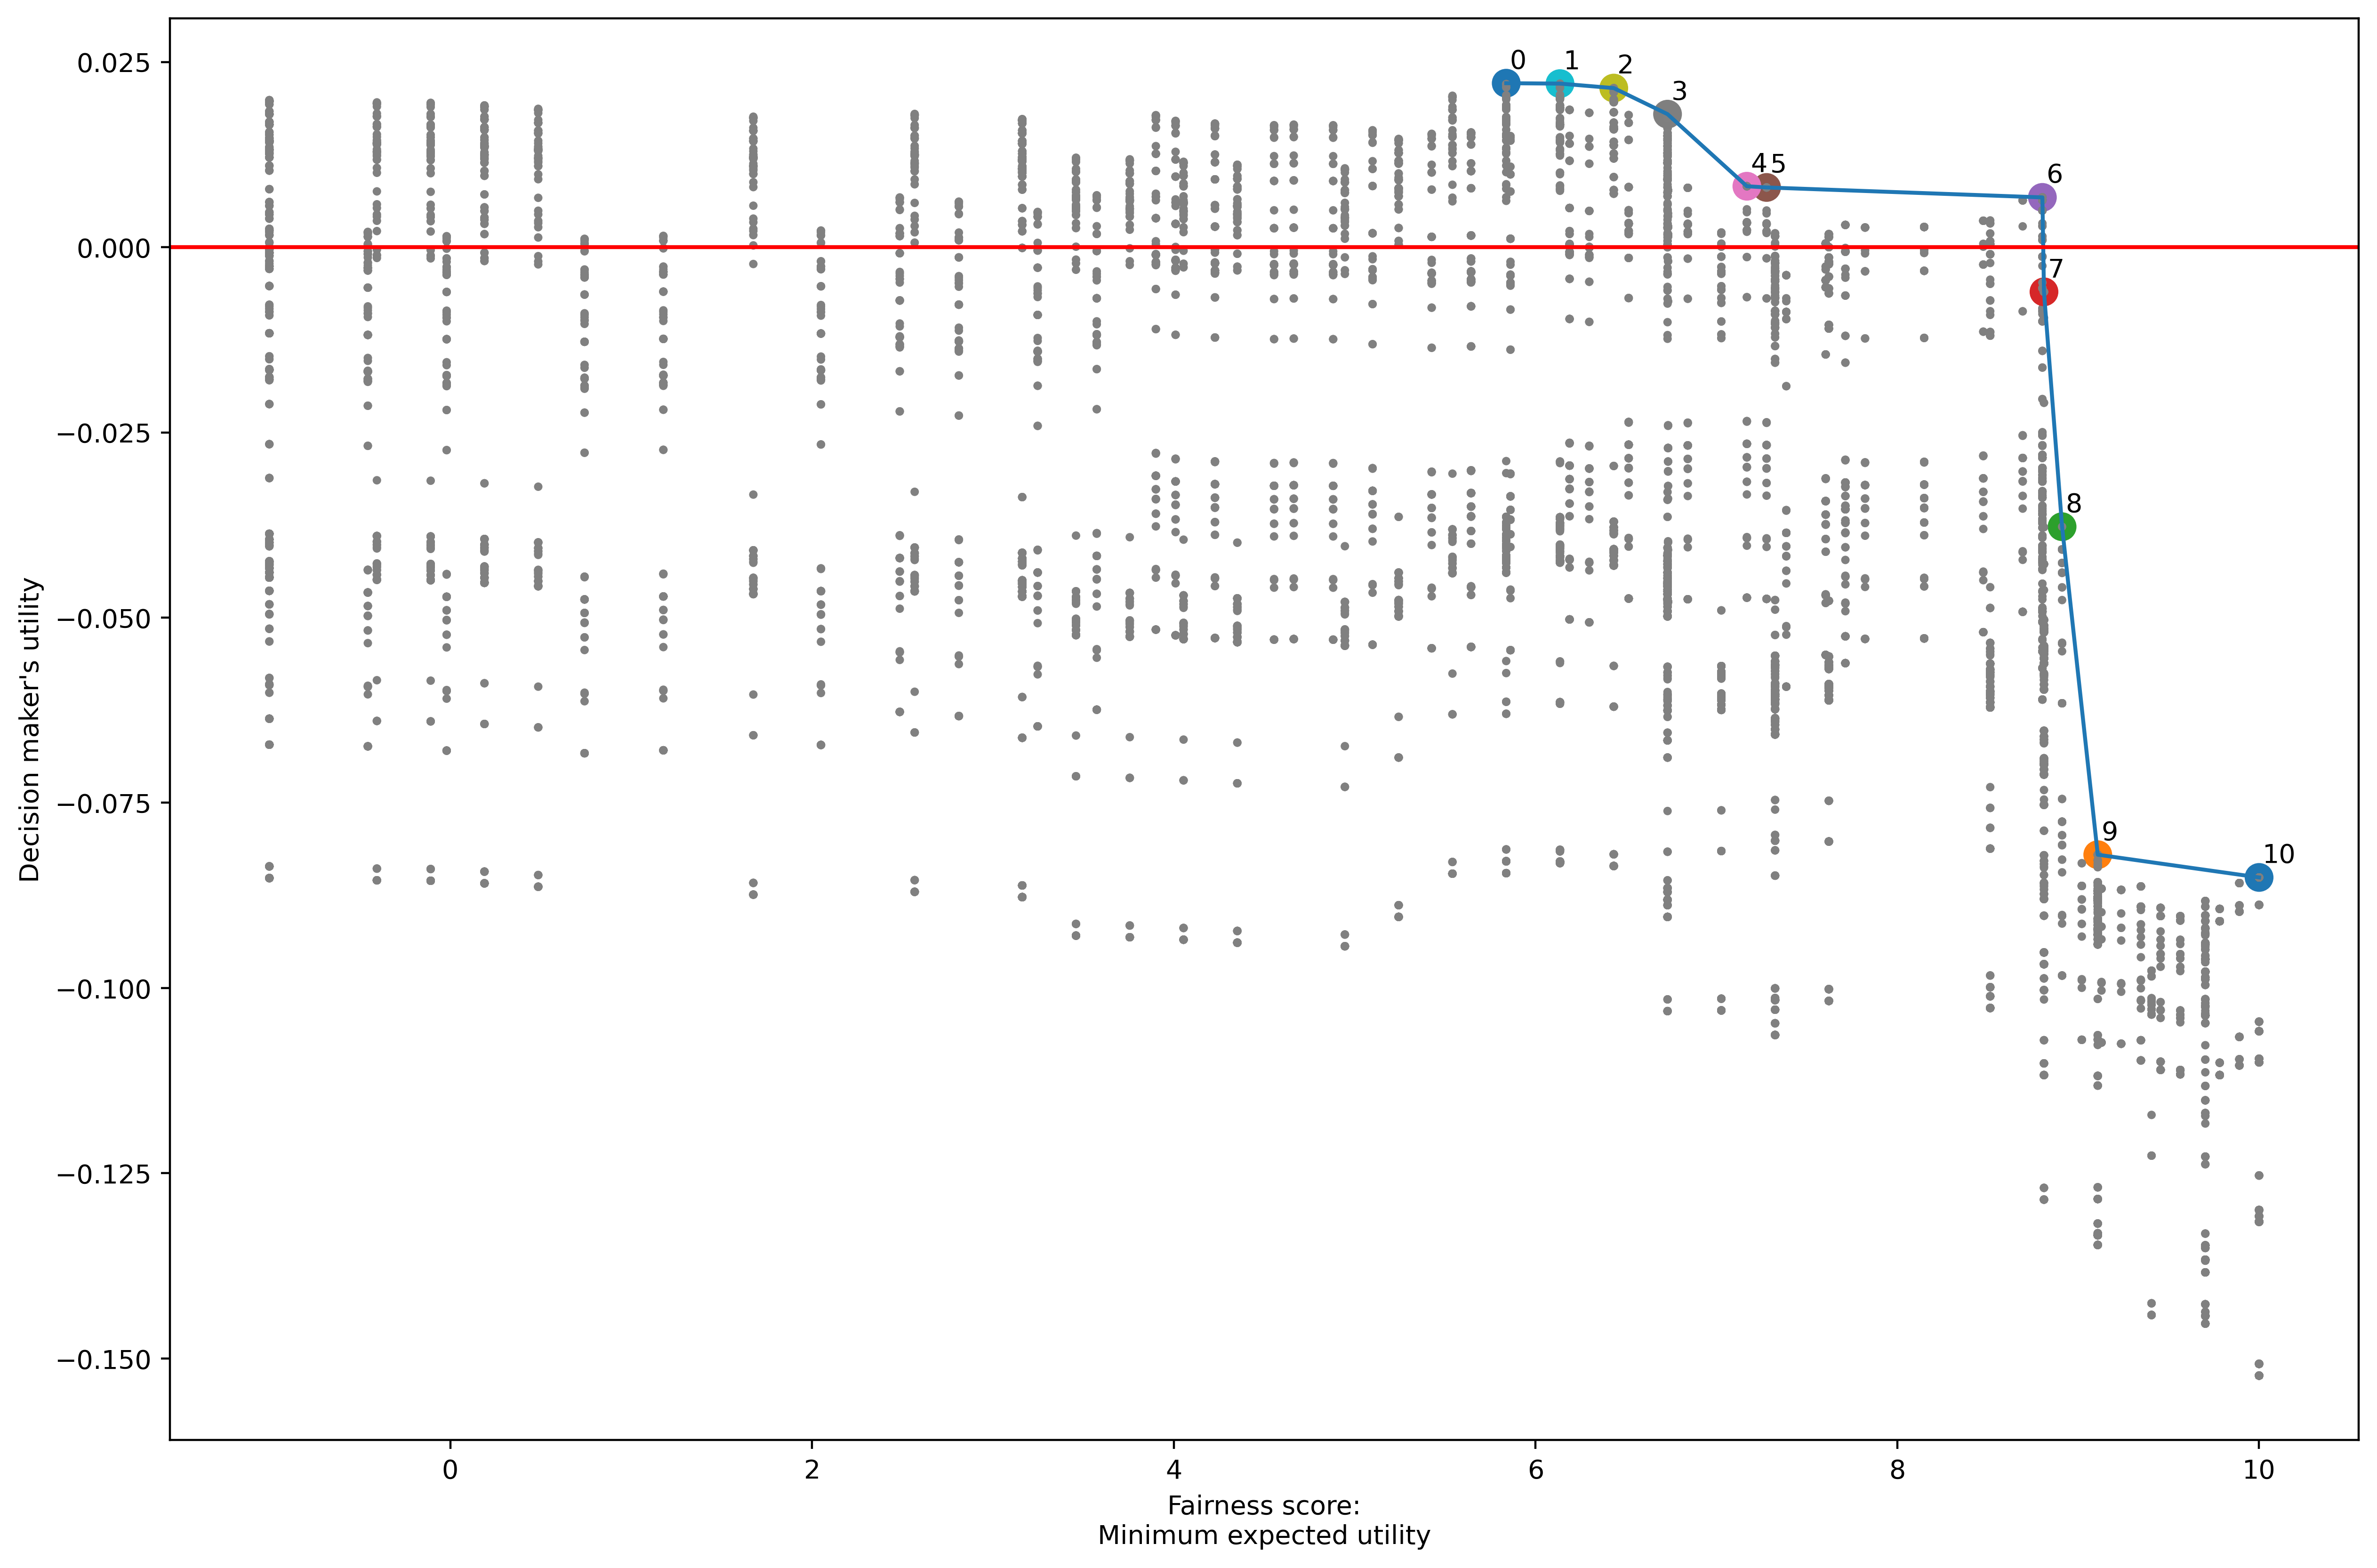

In [33]:
fig, ax = plt.subplots()
color_values = ['C'+str(list(pareto_front_indices).index(p)) if p in pareto_front_indices else 'grey' for p in range(len(U_DM))]
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["figure.dpi"] = 400
plt.plot(np.array(FS)[pareto_front_indices].tolist(), np.array(U_DM)[pareto_front_indices].tolist())
sizes = [100 if c!='grey' else 5 for c in color_values]
ax.scatter(FS, U_DM, c=color_values, s=sizes)

pareto_front_reverse = list(pareto_front_indices)
pareto_front_reverse.reverse()
for i, index in enumerate(pareto_front_reverse):
    ax.annotate(i, (FS[index]+0.02, U_DM[index]+0.002))

plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.ylabel('Decision maker\'s utility')
plt.xlabel(pattern_functions.get_xlabel())
plt.show()

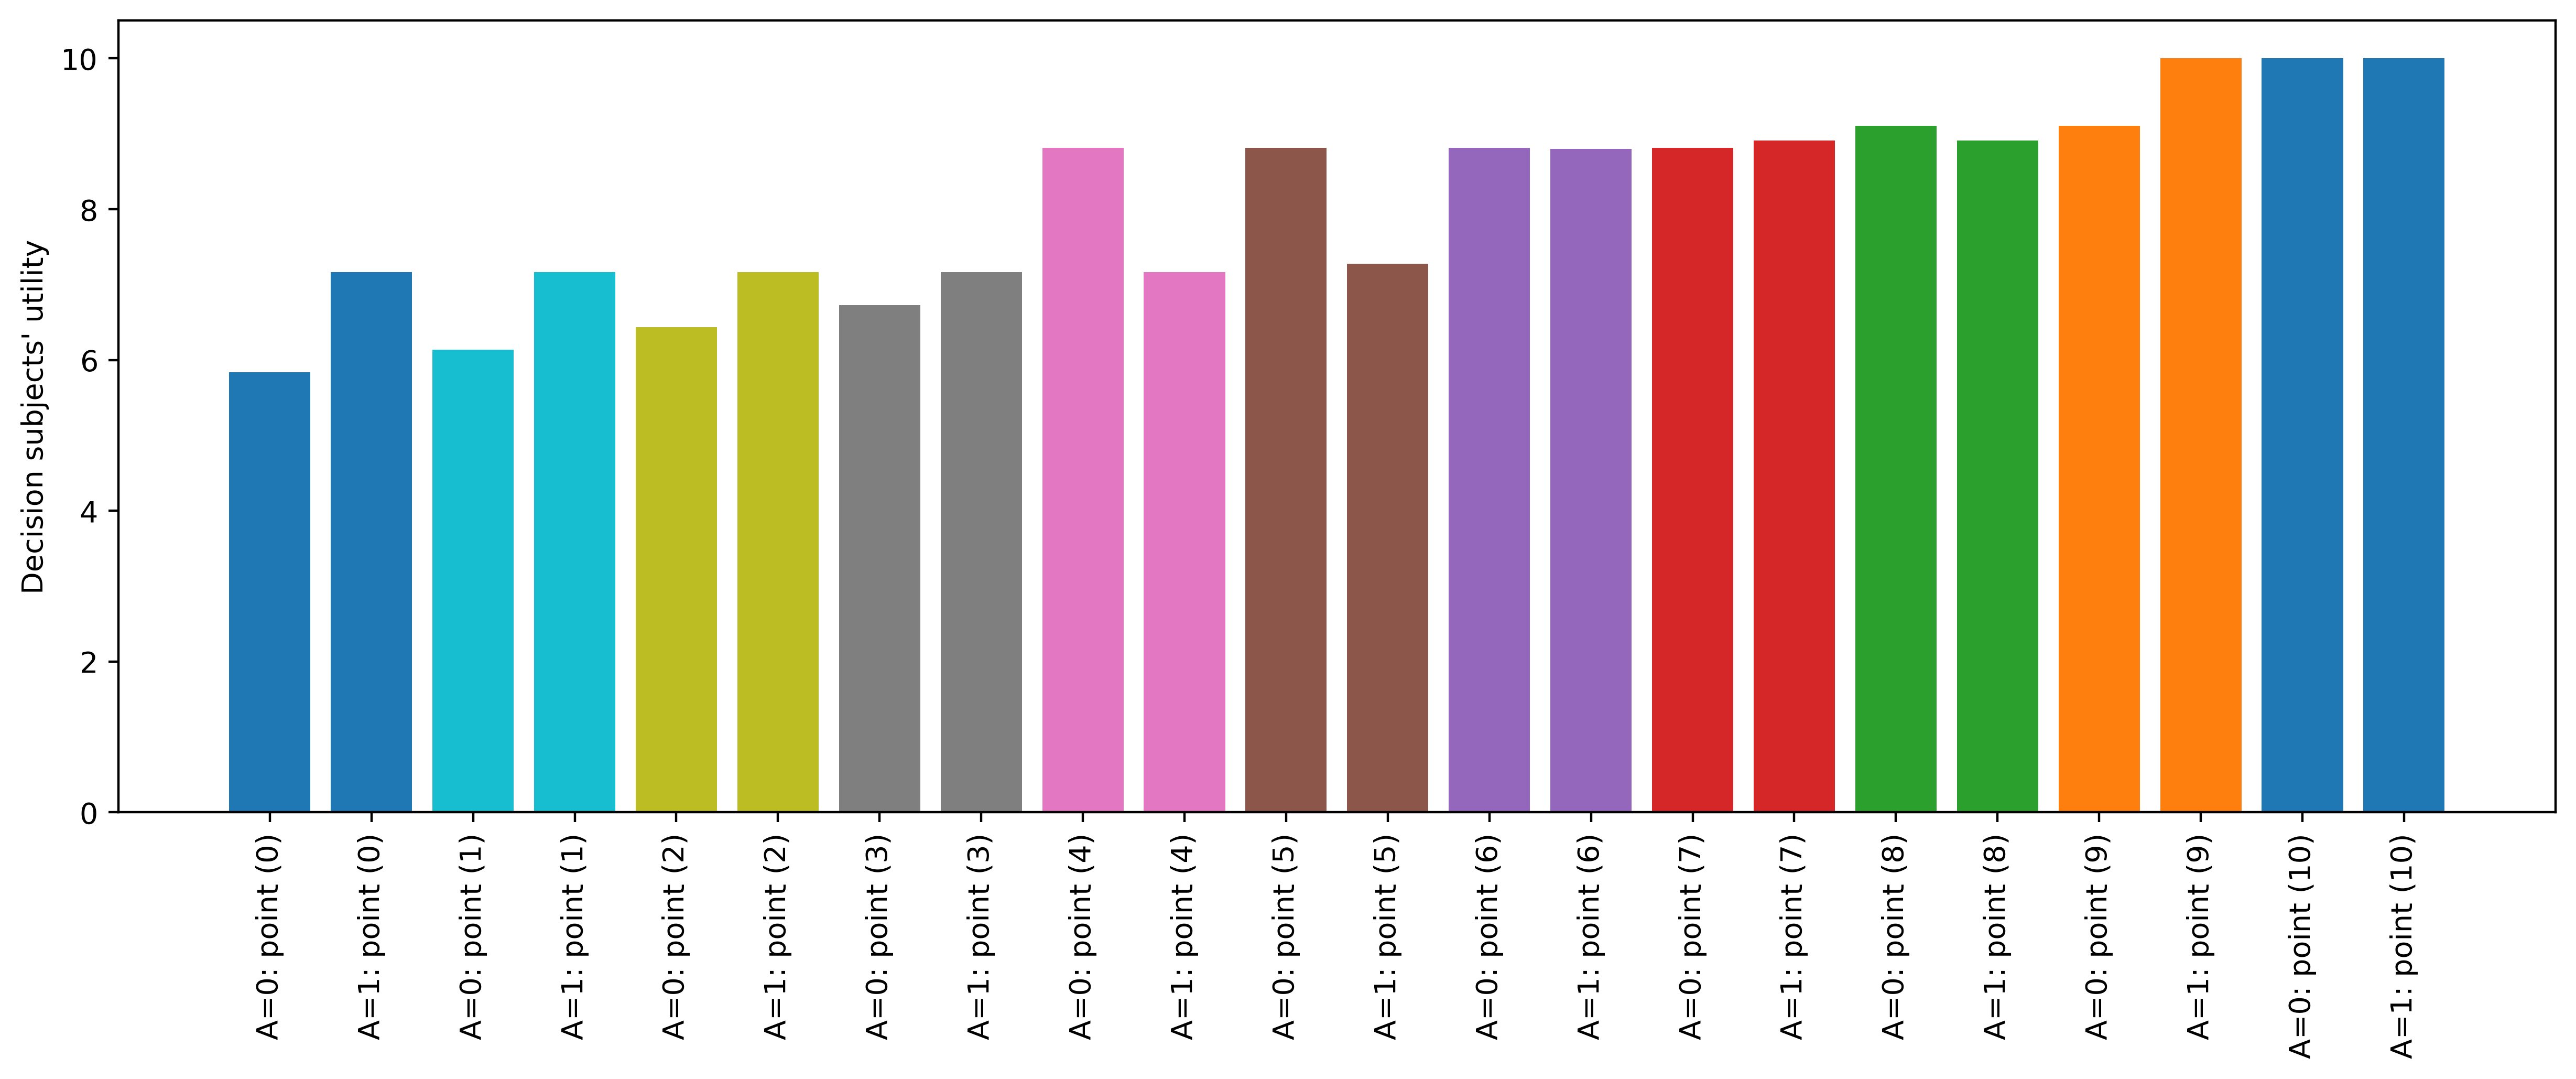

In [36]:
bar_y = []
bar_x = []
counter = 0
c = 0
colors = []
for i in pareto_front_reverse:
#     if counter == 0:
#         bar_x.append('A=0 (max fairness score)')
#         bar_x.append('A=1 (max fairness score)')
#     elif counter == pareto_front_size-1:
#         bar_x.append('A=0 (max decision maker utility)')
#         bar_x.append('A=1 (max decision maker utility)')
#     else:
    bar_x.append('A=0: point (' + str(counter) + ')')
    bar_x.append('A=1: point (' + str(counter) + ')')
    bar_y.append(U_DS_A0[i])
    bar_y.append(U_DS_A1[i])
    colors.append('C'+str(pareto_front_size - counter - 1))
    colors.append('C'+str(pareto_front_size - counter - 1))
    counter += 1
    
plt.rcParams["figure.figsize"] = (15,5)
plt.bar(bar_x, bar_y, color=colors, label=bar_x)
plt.xticks(rotation=90)
plt.ylabel('Decision subjects\' utility')
plt.show()